<a href="https://colab.research.google.com/github/Belindazzzzz/hw-2/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Effective sample size for parameter: df    5.21
Name: ess_bulk, dtype: float64


Effective sample size for parameter: df    18.38
Name: ess_bulk, dtype: float64


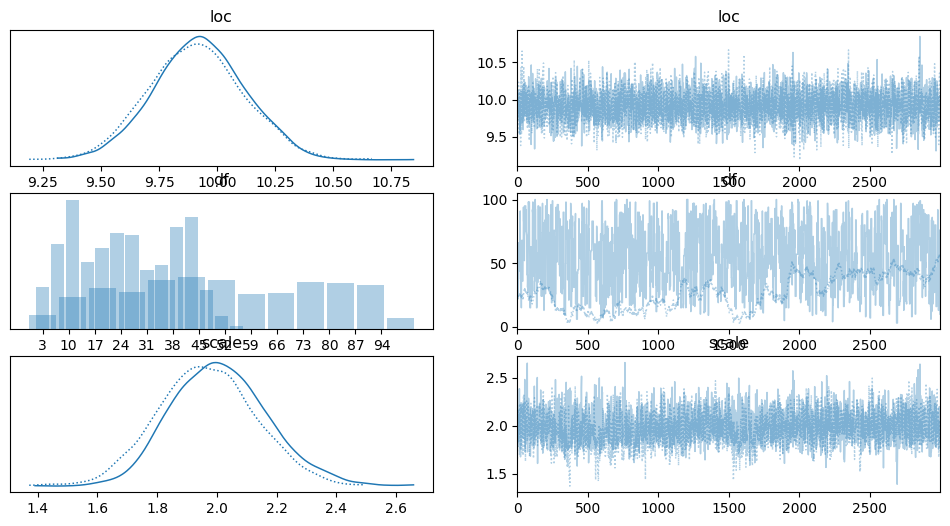

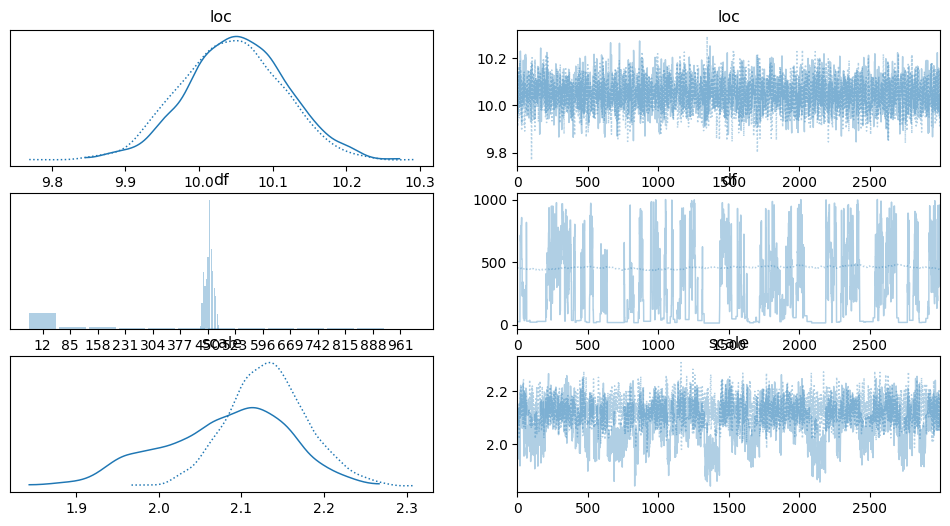

In [6]:
import pymc as pm
import arviz as az
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

mu_0, sigma_0 = 0, 10
n, loc_true, scale_true, df_true = 100, 10, 2, 15
x = stats.t(df=df_true, loc=loc_true, scale=scale_true).rvs(n)
with pm.Model() as model:
    loc = pm.Normal('loc', mu=mu_0, sigma=sigma_0)
    scale = pm.HalfNormal('scale', sigma=5)
    df = pm.DiscreteUniform('df', lower=1, upper=100)
    xo = pm.StudentT('observations', mu=loc, lam=1/scale**2, nu=df, observed=x)
    t = pm.sample(draws=3000, tune=2000, target_accept=0.95)
az.plot_trace(t)
az.summary(t, round_to=2)
su = az.summary(t, var_names=['df'], round_to=2)
e = su['ess_bulk']
print(f"Effective sample size for parameter: {e}")

mu_0, sigma_0 = 0, 10
n, loc_true, scale_true, df_true = 1000, 10, 2, 15
x = stats.t(df=df_true, loc=loc_true, scale=scale_true).rvs(n)
with pm.Model() as model:
    loc = pm.Normal('loc', mu=mu_0, sigma=sigma_0)
    scale = pm.HalfNormal('scale', sigma=5)
    df = pm.DiscreteUniform('df', lower=1, upper=1000)
    xo = pm.StudentT('observations', mu=loc, lam=1/scale**2, nu=df, observed=x)
    t = pm.sample(draws=3000, tune=2000, target_accept=0.95)
az.plot_trace(t)
az.summary(t, round_to=2)
su = az.summary(t, var_names=['df'], round_to=2)
e = su['ess_bulk']
print(f"Effective sample size for parameter: {e}")

<Axes: >

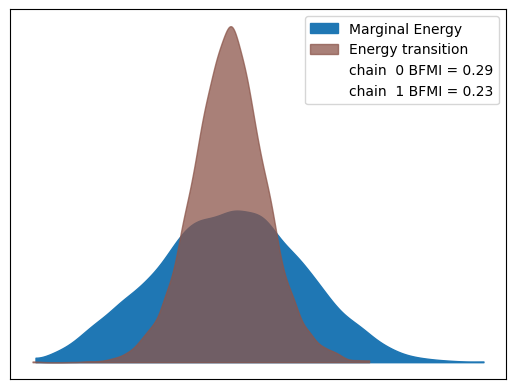

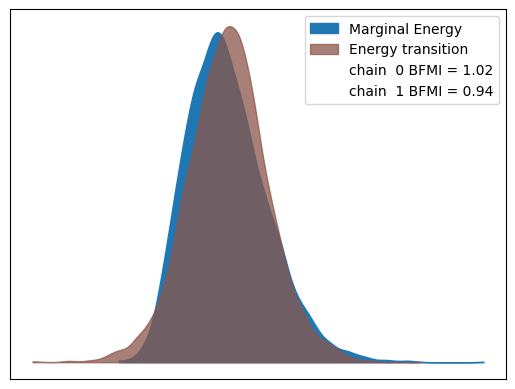

In [5]:
import numpy as np
import pymc as pm

J = 8
y = np.array([28.0, 8.0, -3.0, 7.0, -1.0, 1.0, 18.0, 12.0])
sigma = np.array([15.0, 10.0, 16.0, 11.0, 9.0, 11.0, 10.0, 18.0])
with pm.Model() as Centered_eight:
    mu = pm.Normal("mu", mu=0, sigma=5)
    tau = pm.HalfCauchy("tau", beta=5)
    theta = pm.Normal("theta", mu=mu, sigma=tau, shape=J)
    obs = pm.Normal("obs", mu=theta, sigma=sigma, observed=y)
pm.model_to_graphviz(Centered_eight)
SEED = [20100672, 20130672]
with Centered_eight:
    fit_C = pm.sample(5000, chains=2, tune=1000, random_seed=SEED,
                      return_inferencedata=True, idata_kwargs={"log_likelihood": True})
with pm.Model() as NonCentered_eight:
    mu = pm.Normal("mu", mu=0, sigma=5)
    tau = pm.HalfCauchy("tau", beta=5)
    theta_tilde = pm.Normal("theta_t", mu=0, sigma=1, shape=J)
    theta = pm.Deterministic("theta", mu + tau * theta_tilde)
    obs = pm.Normal("obs", mu=theta, sigma=sigma, observed=y)
with NonCentered_eight:
    fit_NC = pm.sample(5000, chains=2, tune=1000, random_seed=SEED,
                       return_inferencedata=True, idata_kwargs={"log_likelihood": True})

import arviz as az

az.plot_energy(fit_C)
az.plot_energy(fit_NC)

According to the plots, the observed energy porposal distribution is different from the empirical energy distribution in the centered eight schools model and they are almost the same in the uncentered eight schools model.
In addition, the diagnostic supports the previous conclusions in these regards.